In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('seaborn')
import matplotlib.ticker as mticker
import matplotlib.patches as mpatches
import seaborn as sns

C:\Users\macie\AppData\Local\Temp\ipykernel_17032\81238134.py:4: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


In [2]:

train = pd.read_csv('D:/szkola/semestr_6/dane_inz/UNSW_NB15_testing-set.csv')
test = pd.read_csv('D:/szkola/semestr_6/dane_inz/UNSW_NB15_training-set.csv')


In [3]:
data = pd.concat([train,test]).reset_index(drop=True)
#leaving only normal and DoS data
data = data[data['attack_cat'].isin(['Normal', 'DoS'])]
cols_cat = data.select_dtypes('object').columns 
cols_numeric = data._get_numeric_data().columns 


In [4]:
data['service'].unique() 
data['service']= np.where(data['service'] == '-', 'None', data['service'])
print(data['service'].unique())

['None' 'ftp' 'smtp' 'snmp' 'http' 'ftp-data' 'dns' 'ssh' 'radius' 'pop3'
 'dhcp' 'irc' 'ssl']


In [5]:
print(data['sttl'].dtype)
data['sttl'] = pd.to_numeric(data['sttl'], errors='coerce')

int64


<h3>Wizualizacja</h3>

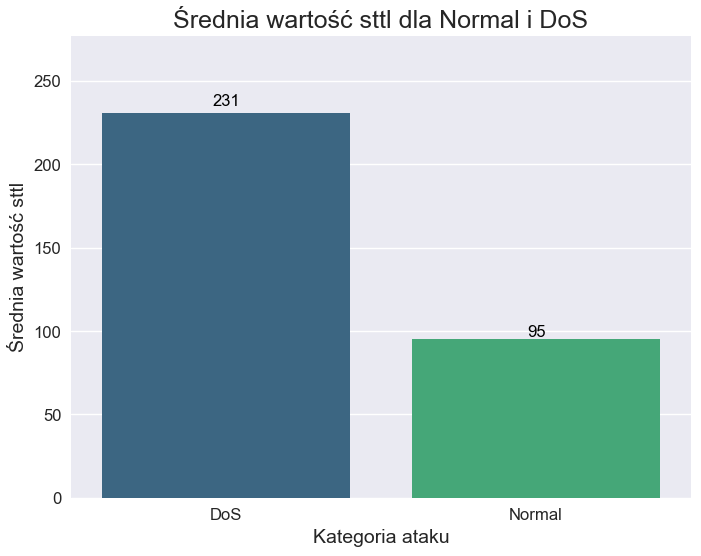

In [6]:
grouped = data.groupby('attack_cat').agg({'sttl': 'mean'})['sttl']

# Create a bar plot
fig, ax = plt.subplots(figsize=(8, 6))
sns.barplot(x=grouped.index, y=grouped, palette="viridis", ax=ax)

# Set title, labels, and other formatting
ax.set_title('Średnia wartość sttl dla Normal i DoS', fontsize=18)
ax.set_xlabel('Kategoria ataku', fontsize=14)
ax.set_ylabel('Średnia wartość sttl', fontsize=14)
ax.set_ylim(0, grouped.max() * 1.2)
ax.yaxis.set_major_formatter(mticker.StrMethodFormatter('{x:,.0f}'))
ax.tick_params(axis='both', which='major', labelsize=12)

# Add data labels on top of the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height():,.0f}', (p.get_x() + p.get_width() / 2, p.get_height() * 1.02),
                ha='center', va='baseline', fontsize=12, color='black')

# Show the plot
plt.show()


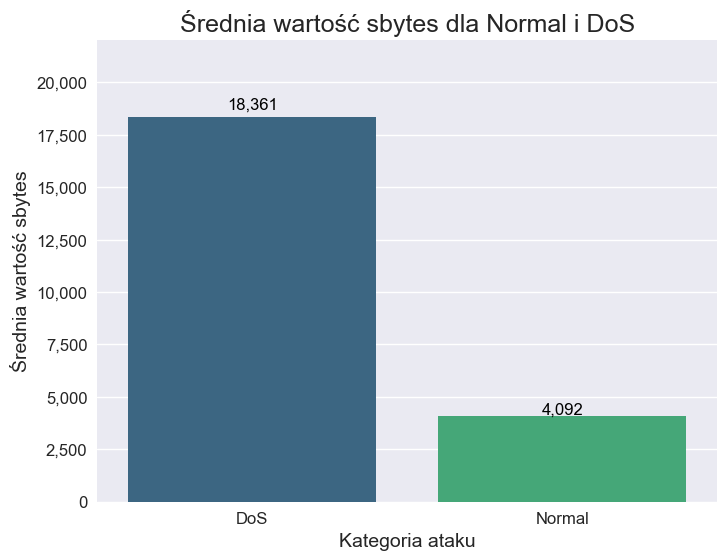

In [7]:
grouped2 = data.groupby('attack_cat').agg({'sbytes': 'mean'})['sbytes']

# Create a bar plot
fig, ax = plt.subplots(figsize=(8, 6))
sns.barplot(x=grouped2.index, y=grouped2, palette="viridis", ax=ax)

# Set title, labels, and other formatting
ax.set_title('Średnia wartość sbytes dla Normal i DoS', fontsize=18)
ax.set_xlabel('Kategoria ataku', fontsize=14)
ax.set_ylabel('Średnia wartość sbytes', fontsize=14)
ax.set_ylim(0, grouped2.max() * 1.2)
ax.yaxis.set_major_formatter(mticker.StrMethodFormatter('{x:,.0f}'))
ax.tick_params(axis='both', which='major', labelsize=12)

# Add data labels on top of the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height():,.0f}', (p.get_x() + p.get_width() / 2, p.get_height() * 1.02),
                ha='center', va='baseline', fontsize=12, color='black')

# Show the plot
plt.show()

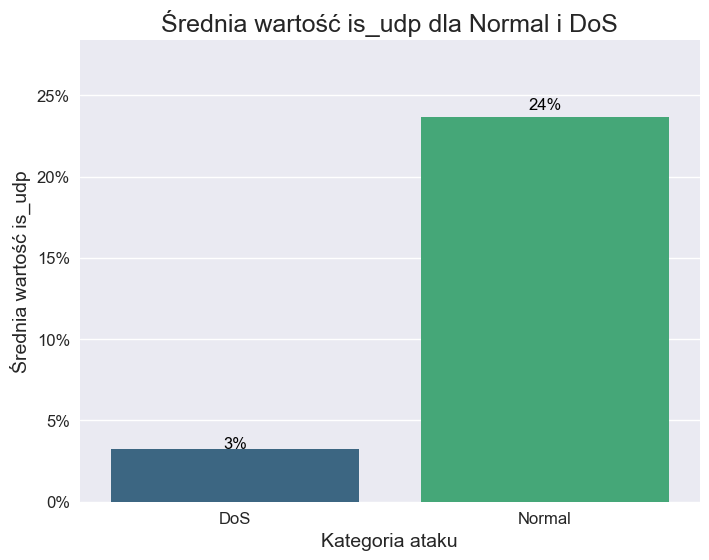

In [8]:
#creating new column with value 1 or 0 depending of beeing udp type or not 
data['is_udp'] = (data['proto'] == 'udp').astype(int)
grouped3 = data.groupby('attack_cat').agg({'is_udp': 'mean'})['is_udp']

# Create a bar plot
fig, ax = plt.subplots(figsize=(8, 6))
sns.barplot(x=grouped3.index, y=grouped3, palette="viridis", ax=ax)

# Set title, labels, and other formatting
ax.set_title('Średnia wartość is_udp dla Normal i DoS', fontsize=18)
ax.set_xlabel('Kategoria ataku', fontsize=14)
ax.set_ylabel('Średnia wartość is_udp', fontsize=14)
ax.set_ylim(0, grouped3.max() * 1.2)
ax.yaxis.set_major_formatter(mticker.PercentFormatter(xmax=1, decimals=0))
ax.tick_params(axis='both', which='major', labelsize=12)

# Add data labels on top of the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height() * 100:.0f}%', (p.get_x() + p.get_width() / 2, p.get_height() * 1.02),
                ha='center', va='baseline', fontsize=12, color='black')

# Show the plot
plt.show()

In [9]:
def Remove_dump_values(data, cols):
    for col in cols:
        data[col] = np.where(data[col] == '-', 'None', data[col])
    return data
cols = data.columns
data_bin = Remove_dump_values(data, cols)
data_bin = data_bin.drop(['id'], axis=1) 
data_bin.drop(['attack_cat'], axis=1, inplace=True)
cols_cat = cols_cat.drop(['attack_cat'])
data_bin_hot = pd.get_dummies(data_bin,columns=cols_cat)
data_bin_hot.shape
cols_numeric = list(cols_numeric)
cols_numeric.remove('label')
cols_numeric.remove('id')
data_bin_hot[cols_numeric] = data_bin_hot[cols_numeric].astype('float') 
data_bin_hot[cols_numeric] = (data_bin_hot[cols_numeric] - np.min(data_bin_hot[cols_numeric])) / np.std(data_bin_hot[cols_numeric])
X = data_bin_hot.drop('label', axis=1)
y = data_bin_hot['label']

In [ ]:
top_features = ['proto_udp', 'sbytes', 'ct_srv_dst', 'smean']

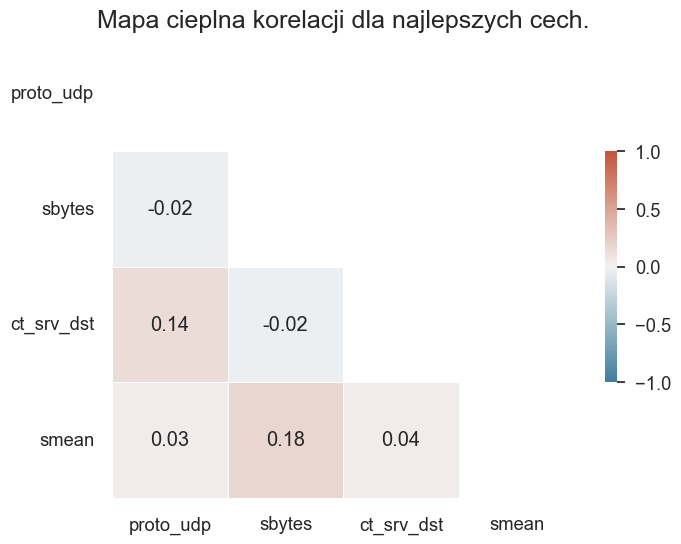

In [16]:

corr_matrix = X_labeled[top_features].corr()

sns.set(style="white", font_scale=1.2)

mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

f, ax = plt.subplots(figsize=(8, 6))

cmap = sns.diverging_palette(230, 20, as_cmap=True)

sns.heatmap(corr_matrix, annot=True, mask=mask, cmap=cmap, vmin=-1, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, fmt='.2f')

plt.title("Mapa cieplna korelacji dla najlepszych cech.", fontsize=18)

plt.yticks(rotation=0)

plt.show()

<__array_function__ internals>:200: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


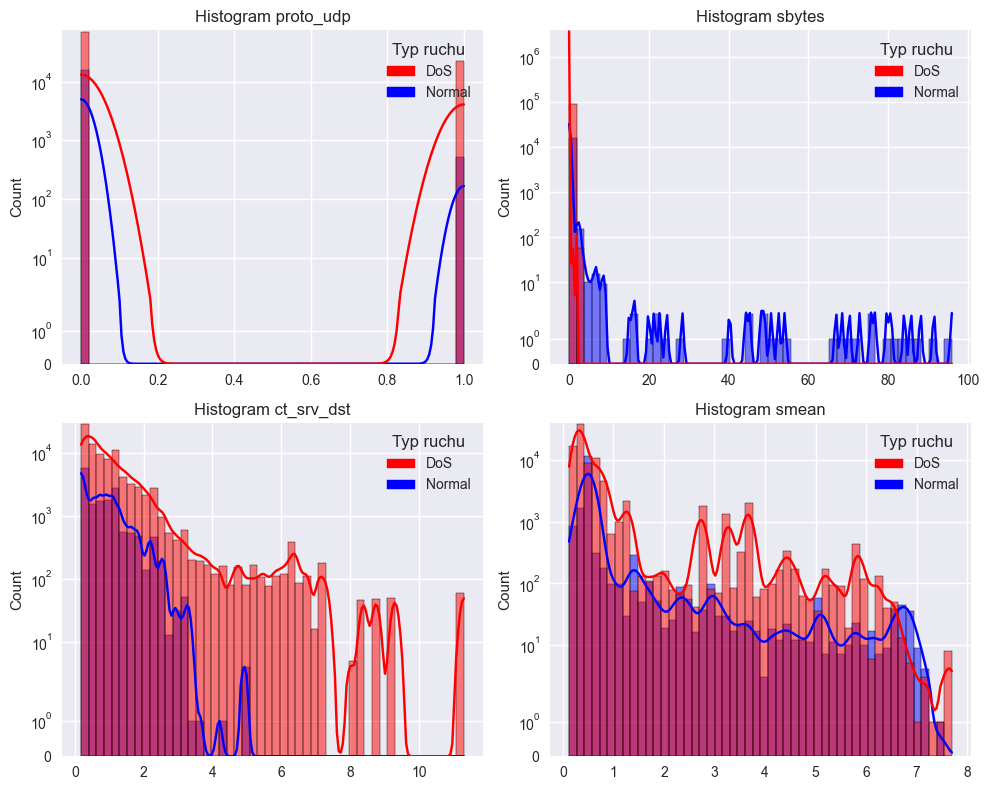

In [11]:
binary_labels = np.where(data['attack_cat'] == 'Normal', 0, 1)

# Przypisanie etykiet do danych
X_labeled = X.copy()
X_labeled['etykieta'] = binary_labels

top_features = ['proto_udp', 'sbytes', 'ct_srv_dst', 'smean']

# Create subplots for each feature
fig, axes = plt.subplots(2, 2, figsize=(10, 8))
axes = axes.ravel()

# Loop through the top features and create individual histograms
for i, feature in enumerate(top_features):
    ax = axes[i]
    sns.histplot(x=feature, hue='etykieta', data=X_labeled, palette=["red", "blue"], bins=50, kde=True, ax=ax)
    ax.set_title(f'Histogram {feature}')
    ax.set_xlabel(None)
    
     # Apply square root scaling to the y-axis
    ax.set_yscale('symlog')
    
    # Create a legend
    red_patch = mpatches.Patch(color='red', label='DoS')
    blue_patch = mpatches.Patch(color='blue', label='Normal')

    # Add the legend to the plot
    ax.legend(handles=[red_patch, blue_patch], loc='upper right', title='Typ ruchu', title_fontsize=12, fontsize=10)

plt.tight_layout()
plt.show()

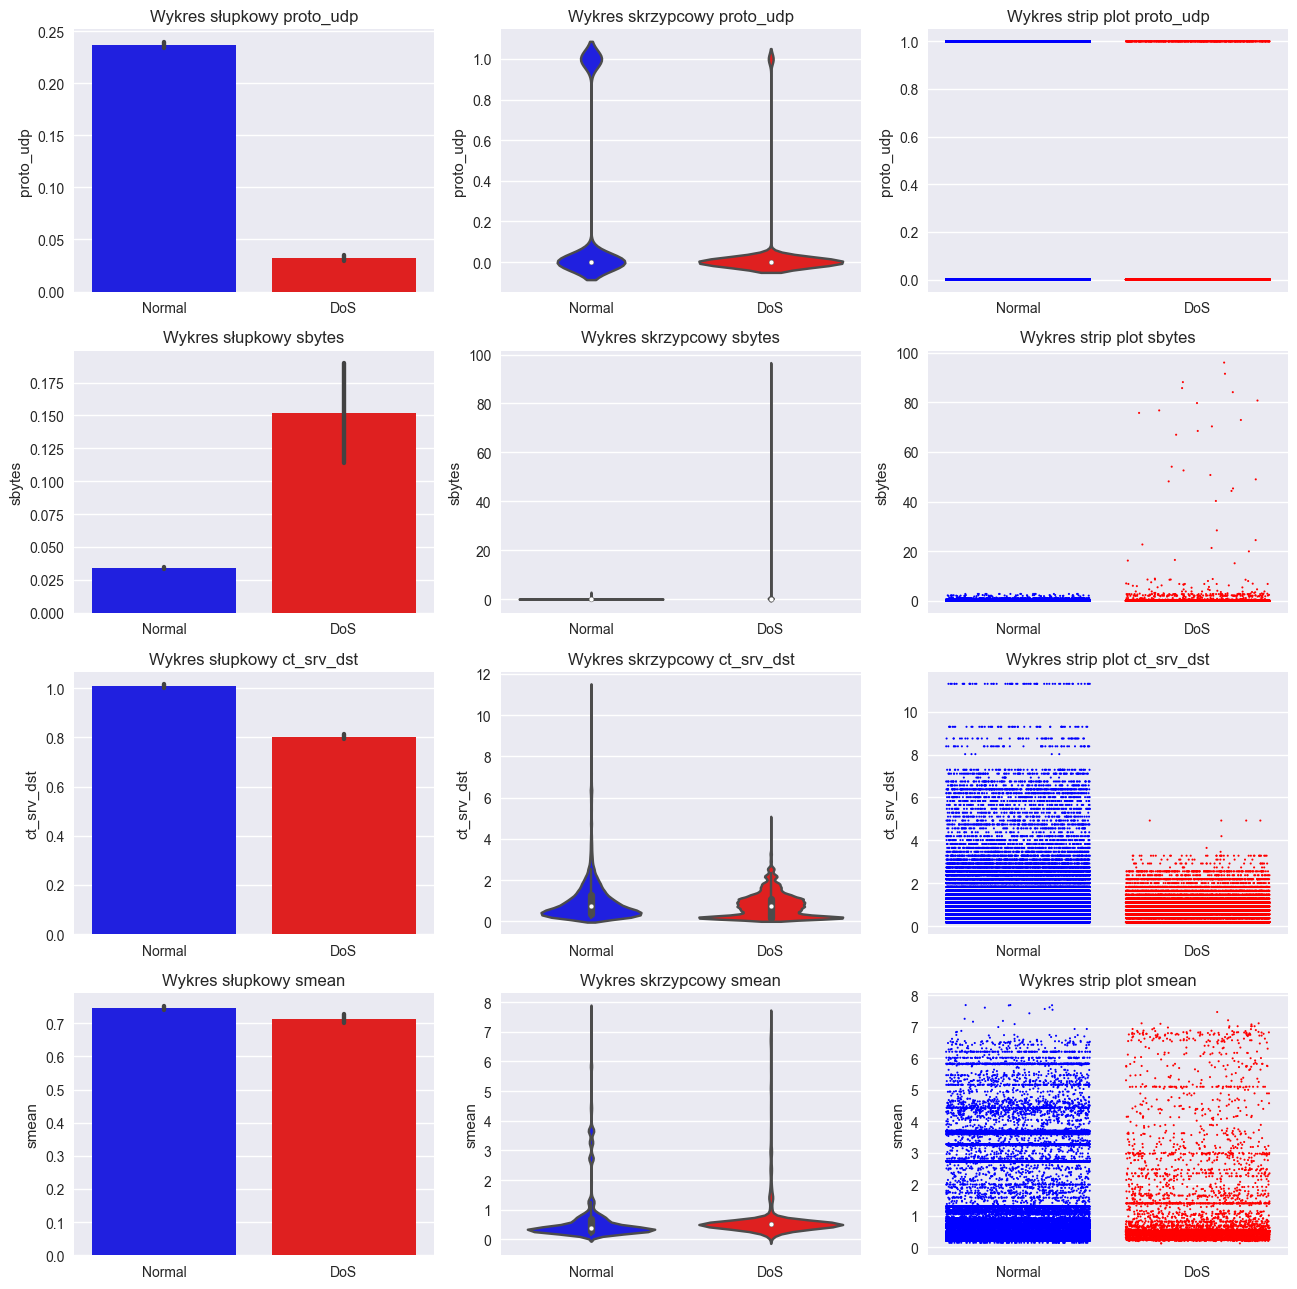

In [12]:
# Convert 'proto_udp' boolean values to integers
X_labeled = X.copy()
X_labeled['label'] = y
X_labeled['proto_udp'] = X_labeled['proto_udp'].astype(int)

# Create subplots for each feature
n_features = len(top_features)
fig, axes = plt.subplots(n_features, 3, figsize=(13, 13))

# Loop through the top features and create bar plots, violin plots, and strip plots
for i, feature in enumerate(top_features):
    # Bar plot
    ax1 = axes[i][0]
    sns.barplot(x='label', y=feature, data=X_labeled, palette=["blue", "red"], ax=ax1)
    ax1.set_title(f'Wykres słupkowy {feature}')
    ax1.set_xticks(range(2))
    ax1.set_xticklabels(['Normal', 'DoS'])
    ax1.set_xlabel(None)

    # Violin plot
    ax2 = axes[i][1]
    sns.violinplot(x='label', y=feature, data=X_labeled, palette=["blue", "red"], ax=ax2)
    ax2.set_title(f'Wykres skrzypcowy {feature}')
    ax2.set_xticks(range(2))
    ax2.set_xticklabels(['Normal', 'DoS'])
    ax2.set_xlabel(None)

    # Strip plot with increased jitter
    ax3 = axes[i][2]
    sns.stripplot(x='label', y=feature, hue='label', data=X_labeled, palette=["blue", "red"], size=1.5, jitter=0.4, ax=ax3)
    ax3.set_title(f'Wykres strip plot {feature}')
    ax3.set_xticks(range(2))
    ax3.set_xticklabels(['Normal', 'DoS'])
    ax3.set_xlabel(None)
    ax3.get_legend().remove()

plt.tight_layout()
plt.show()